<a href="https://colab.research.google.com/github/atul6876/Diabetic_Retinopathy_Detection/blob/main/Diabetic_Retinopathy_Multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Change Runtime Type to GPU. The code below checks if the GPU is provisioned for this runtime
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# Import the necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import sklearn

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model                     # Model is useful to edit the layers of an existing model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

Using TensorFlow backend.


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Aptos Dataset/train.csv')
data.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


### **Diabetic Retinopathy diagnosis labels**:

0 - No DR

1 - Mild

2 - Moderate

3 - Severe

4 - Proliferative DR

In [ ]:
# print out the number of instances of class labels for the data.
data['diagnosis'].value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

In [ ]:
# Appending a column with Text labels: This step is necessary because we're going to use the flow_from_dataframe method for iterating over images while fitting our model
Multiclass_Diagnosis=[]
for i in data['diagnosis']:
    if i == 0:
        Multiclass_Diagnosis.append('No DR')
    elif i == 1:
        Multiclass_Diagnosis.append('Mild')
    elif i == 2:
        Multiclass_Diagnosis.append('Moderate')
    elif i == 3:
        Multiclass_Diagnosis.append('Severe')
    else:
        Multiclass_Diagnosis.append('Proliferative DR')
print(len(Multiclass_Diagnosis))

3662


In [ ]:
# Add the Multiclass classification column to the dataframe
data['Multiclass_Diagnosis'] = Multiclass_Diagnosis
data.head()

,id_code,diagnosis,Multiclass_Diagnosis
0,000c1434d8d7,2,Moderate
1,001639a390f0,4,Proliferative DR
2,0024cdab0c1e,1,Mild
3,002c21358ce6,0,No DR
4,005b95c28852,0,No DR


In [ ]:
# Also, apend the image file formats (which is .png) to our image id's so that flow_from_dataframe method can work ()
img_id = [(i+'.png') for i in data['id_code']]
len(img_id)

3662

In [ ]:
data['img_id'] = img_id
data.head()

,id_code,diagnosis,Multiclass_Diagnosis,img_id
0,000c1434d8d7,2,Moderate,000c1434d8d7.png
1,001639a390f0,4,Proliferative DR,001639a390f0.png
2,0024cdab0c1e,1,Mild,0024cdab0c1e.png
3,002c21358ce6,0,No DR,002c21358ce6.png
4,005b95c28852,0,No DR,005b95c28852.png


In [ ]:
# Print out the number of instances of each label in our dataset.
data['Multiclass_Diagnosis'].value_counts()

No DR               1805
Moderate             999
Mild                 370
Proliferative DR     295
Severe               193
Name: Multiclass_Diagnosis, dtype: int64

In [ ]:
data[data['diagnosis']==0]['img_id']

3       002c21358ce6.png
4       005b95c28852.png
6       0097f532ac9f.png
10      00cc2b75cddd.png
12      00f6c1be5a33.png
              ...       
3651    ff4cd992667b.png
3653    ff59d44a70a7.png
3654    ff631653374e.png
3658    ffc04fed30e6.png
3660    ffd97f8cd5aa.png
Name: img_id, Length: 1805, dtype: object

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

Img_dir = '/content/drive/My Drive/Aptos Dataset/train_images/'

pix = [os.path.join(Img_dir, fname) for fname in data[data['diagnosis']==0]['img_id']]
pic_index = 4

while i < 4:
  for i, img_path in enumerate(pix):
    sp = plt.subplot(1,4,pic_index - i)
    sp.axis('Off') 
    img = mpimg.imread(img_path)
    plt.imshow(img)
    i+=1

plt.show()

In [ ]:
# Splitting the training dataset into training and validation sets for our tuning. 
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data, test_size = 0.25, stratify = data['Multiclass_Diagnosis'])

In [ ]:
# Print out the number of instances of each label in our training dataset
print(train_df['Multiclass_Diagnosis'].value_counts())
print('Shape of the train_df dataframe: ', train_df.shape)
train_df.head()

No DR               1354
Moderate             749
Mild                 277
Proliferative DR     221
Severe               145
Name: Multiclass_Diagnosis, dtype: int64
Shape of the train_df dataframe:  (2746, 4)


,id_code,diagnosis,Multiclass_Diagnosis,img_id
190,0dce95217626,1,Mild,0dce95217626.png
1037,4a44cc840ebe,2,Moderate,4a44cc840ebe.png
2647,b7983cb3f270,0,No DR,b7983cb3f270.png
2497,ad20080452de,0,No DR,ad20080452de.png
439,1f07dae3cadb,2,Moderate,1f07dae3cadb.png


In [ ]:
# Print out the number of instances of each label in our validation dataset
print(test_df['Multiclass_Diagnosis'].value_counts())
print('Shape of the test_df dataframe: ', test_df.shape)
test_df.head()

No DR               451
Moderate            250
Mild                 93
Proliferative DR     74
Severe               48
Name: Multiclass_Diagnosis, dtype: int64
Shape of the test_df dataframe:  (916, 4)


,id_code,diagnosis,Multiclass_Diagnosis,img_id
417,1dd9adcbfff4,2,Moderate,1dd9adcbfff4.png
3326,e6a58edc5b42,2,Moderate,e6a58edc5b42.png
1750,7ba6b23c4b46,0,No DR,7ba6b23c4b46.png
2442,a9e3d186cd1b,0,No DR,a9e3d186cd1b.png
273,14e3f84445f7,3,Severe,14e3f84445f7.png


In [ ]:
# Setting the dimensions of our images.

img_width, img_height = 224, 224

imgs_dir = '/content/drive/My Drive/Aptos Dataset/train_images/'

epochs = 5 # try more if you have patience. The model takes a long time to train even on GPU runtime (~40-45 mins per epoch)
batch_size = 20 # try 16, 32 etc.

In [ ]:
# Setting the input shape format: 3 is the color channels (RGB)

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [ ]:
# Loading the vgg16 model from keras with imagenet weights, setting the input shape for our interests 

vgg = keras.applications.vgg16.VGG16(include_top=True
                                     , weights='imagenet'
                                     , input_tensor=None
                                     , input_shape=input_shape
                                     , pooling=None)
vgg.summary()                                                                   # print out the model summary

553467904/553467096 [==============================] - 13s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

In [ ]:
# Print the total number of layers
print(len(vgg.layers))
print()
#Print out the layers in vgg model
for layer in vgg.layers: 
    print(layer)

# Freeze the training weights until the flattening layer and only train the final 2 fully-connected layers and an updated final o/p layer with only one node 
for layer in vgg.layers[:20]:
    layer.trainable=False

23



In [ ]:
# Change the final dense layer to 5 nodes (softmax activation) for multi-class classification
x = vgg.layers[-2].output
output_layer = Dense(5, activation='softmax', name='predictions')(x)

In [ ]:
# Combine the output layer to the original model
vgg_mc = Model(inputs=vgg.input, outputs=output_layer)

In [ ]:
# Sanity check: Print out the model summary. The final layer should have 5 nodes (using softmax activation)
vgg_mc.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
# Compile the modified vgg model with the following hyperparameters
# In future try different learning rates for the adam 'adaptive moment estimation'
# The loss function is going to be sparse_categorical_crossentropy since the class labels are integers (refer the Keras API docs for different loss function options)
vgg_mc.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Defining Image transformations: normalization (rescaling) for both training and testing images
# Defining Image transformations: Augmenting the training data with the following transformation - (only allowing random horizontal flips) 
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    #shear_range=0.2,
    #zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Setting up the flow of images in batches for training and validation

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=imgs_dir,
    x_col="img_id",
    y_col="Multiclass_Diagnosis",
    target_size=(img_width, img_height),
    class_mode="sparse",
    batch_size=batch_size
   )

validation_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=imgs_dir,
    x_col="img_id",
    y_col="Multiclass_Diagnosis",
    target_size=(img_width, img_height),
    class_mode="sparse",
    batch_size=batch_size
   )
# Printing out the class labels for both training and validation sets
print(train_generator.class_indices)
print(validation_generator.class_indices)

Found 2746 validated image filenames belonging to 5 classes.
Found 916 validated image filenames belonging to 5 classes.
{'Mild': 0, 'Moderate': 1, 'No DR': 2, 'Proliferative DR': 3, 'Severe': 4}
{'Mild': 0, 'Moderate': 1, 'No DR': 2, 'Proliferative DR': 3, 'Severe': 4}


### **Data Composition - percentage mix of the images for each class label in the data**

0.   No DR            - 1805/3662 = 49.29 % 
1.   Moderate         - 999/3662  = 27.28 % 
2.   Mild             - 370/3662  = 10.10 %
3.   Severe           - 193/3662  = 5.27 %
4.   Proliferative DR - 295/3662  = 8.05 %





In [ ]:
history = vgg_mc.fit_generator(
        train_generator,
        steps_per_epoch=2746 // batch_size,
        epochs=epochs,
        # Class_Weight argument expects a dictionary for the class labels (as detected by the train generators) as keys and their weights as values.
        # This instructs the loss calculations during training to pay more attention to underrepresented classes. Please try training with class_weights once.
        #class_weight = {0:0.25, 1:0.10, 2:0.05, 3:0.30, 4:0.30},                         
        validation_data=validation_generator,
        validation_steps=916 // batch_size)

vgg_mc.save('/content/drive/My Drive/Aptos Dataset/Final_Multiclass_Model.h5')
print('Saved the model to disk.')

Epoch 1/5
137/137 [==============================] - 2576s 19s/step - loss: 2.2316 - accuracy: 0.6607 - val_loss: 0.8514 - val_accuracy: 0.6733
Epoch 2/5
137/137 [==============================] - 1992s 15s/step - loss: 0.7711 - accuracy: 0.7274 - val_loss: 0.4418 - val_accuracy: 0.6830
Epoch 3/5
137/137 [==============================] - 2066s 15s/step - loss: 0.7398 - accuracy: 0.7282 - val_loss: 1.0175 - val_accuracy: 0.7288
Epoch 4/5
137/137 [==============================] - 2017s 15s/step - loss: 0.7041 - accuracy: 0.7395 - val_loss: 0.9373 - val_accuracy: 0.7277
Epoch 5/5
 40/137 [=======>......................] - ETA: 12:59 - loss: 0.6905 - accuracy: 0.7275

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 112 could not be retrieved. It could be because a worker has died.
  UserWarning)


136/137 [============================>.] - ETA: 11s - loss: 0.6885 - accuracy: 0.7373

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 8 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 28 could not be retrieved. It could be because a worker has died.
  UserWarning)


137/137 [==============================] - 2165s 16s/step - loss: 0.6873 - accuracy: 0.7381 - val_loss: 1.1775 - val_accuracy: 0.7422
Saved the model to disk.


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


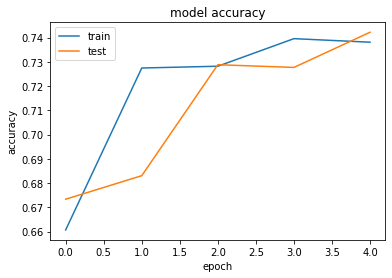

In [ ]:
# Print out the metrics recorded during training (saved in the history)
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

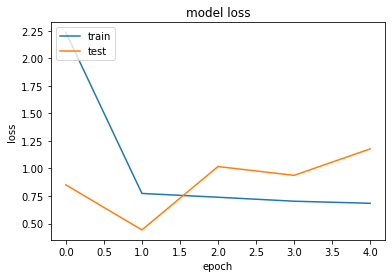

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

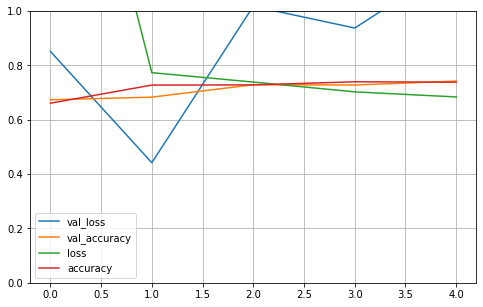

In [ ]:
# Another way to plot all metrics in one plot, but here it is all over the place.
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()